In [ ]:
# ImageDataGenerator and the link with preprocessing layers

# Example with some more data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)

2025-04-15 07:33:48.099227: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-15 07:33:48.224782: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744695228.303157 1913534 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744695228.330750 1913534 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-15 07:33:48.442405: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

(60000, 28, 28)
(60000,)


In [2]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_train.shape

(60000, 28, 28, 1)

(5, 28, 28, 1)
(5,) [5 0 4 1 9]


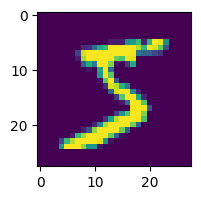

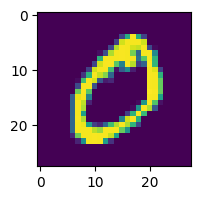

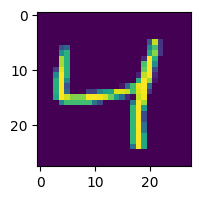

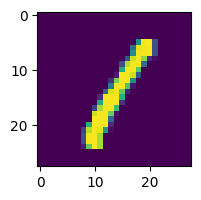

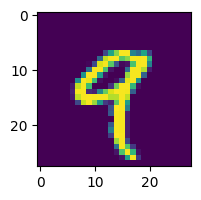

In [4]:
SAMPLES=5
x_mnist = x_train[:SAMPLES]
print(x_mnist.shape)
y_mnist = y_train[:SAMPLES]
print(y_mnist.shape, y_mnist)

for i in range(SAMPLES):
    plt.figure(figsize=(2,2))
    plt.imshow(x_mnist[i], cmap="viridis")
    plt.show()



0 <class 'numpy.ndarray'> (2, 28, 28, 1)
0 <class 'numpy.ndarray'> (2,) [5 4]


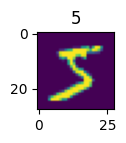

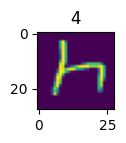

1 <class 'numpy.ndarray'> (2, 28, 28, 1)
1 <class 'numpy.ndarray'> (2,) [9 0]


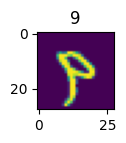

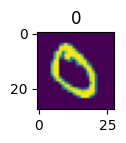

2 <class 'numpy.ndarray'> (1, 28, 28, 1)
2 <class 'numpy.ndarray'> (1,) [1]


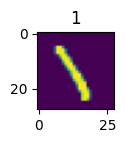

3 <class 'numpy.ndarray'> (2, 28, 28, 1)
3 <class 'numpy.ndarray'> (2,) [0 9]


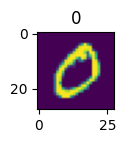

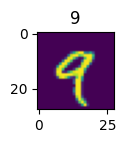

4 <class 'numpy.ndarray'> (2, 28, 28, 1)
4 <class 'numpy.ndarray'> (2,) [4 5]


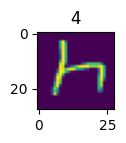

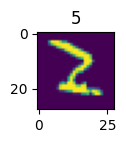

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

 
# construct the training image generator for data augmentation
data_generator_2 = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    interpolation_order=1,
    dtype=None
)

i = 0
for x_img, y_img in data_generator_2.flow(x=x_mnist, y=y_mnist, batch_size=2):
    if i>=5:
        break
    print(i, type(x_img), x_img.shape)
    print(i, type(y_img), y_img.shape, y_img)
    for p in range(x_img.shape[0]):
        plt.figure(figsize=(1,1))
        plt.imshow(x_img[p])
        plt.title(y_img[p])
        plt.show()
    i = i+1
# train the network
# Het NN weet niet meer hoeveel epochs er moeten uitgevoerd woden, dus moet dit nu aangegeven worden
# history_aug = model.fit(
#     aug.flow(X_train, y_train, batch_size=batch_size),
#     steps_per_epoch=len(X_train) // batch_size,
#     epochs=epochs,
#     validation_data = (X_test,y_test)
# )